In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

# Papildomai importuojame: 
from sklearn.linear_model import LinearRegression  # Tiesinės regresijos modelis
from sklearn.model_selection import train_test_split  # Duomenų padalijimas į treniravimo ir testavimo rinkinius
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [96]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

In [111]:
# Titanic Kaggle uzduotis # https://www.kaggle.com/competitions/titanic/overview/evaluation
## Issitraukiame duomenis analizei 



failo_kelias2 = r"C:\Users\Pauliussl\Paskaita79\Titanic\train.csv"
train_data = pd.read_csv(failo_kelias2, header=0)

train_data["Survived"] = pd.to_numeric(train_data["Survived"], errors='coerce')  # Survived
train_data["Pclass"] = pd.to_numeric(train_data["Pclass"], errors='coerce')      # Pclass
train_data["Sex"] = train_data["Sex"].map({'male': 0, 'female': 1})              # Sex
train_data["Age"] = pd.to_numeric(train_data["Age"], errors='coerce')           # Age
train_data["SibSp"] = pd.to_numeric(train_data["SibSp"], errors='coerce')       # SibSp
train_data["Parch"] = pd.to_numeric(train_data["Parch"], errors='coerce')       # Parch
train_data["Fare"] = pd.to_numeric(train_data["Fare"], errors='coerce')         # Fare
train_data["Embarked"] = train_data["Embarked"].map({"S": 0, "C": 1, "Q": 2})   # Embarked

train_data["Age"] = train_data["Age"].fillna(train_data["Age"].median())         # Susivedame amžiaus vidurkį
train_data = train_data.dropna(subset=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])  # Dropiname tuščias reikšmes
train_data = train_data.iloc[1:]                                                # Pašaliname pirmą eilutę (jei reikia)

train_data.head()

X = train_data[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]
y = train_data["Survived"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [119]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1
 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1]


Model accuracy: 0.77
Confusion Matrix:
[[86 23]
 [18 51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.74      0.71        69

    accuracy                           0.77       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.77      0.77       178



<Figure size 640x480 with 0 Axes>

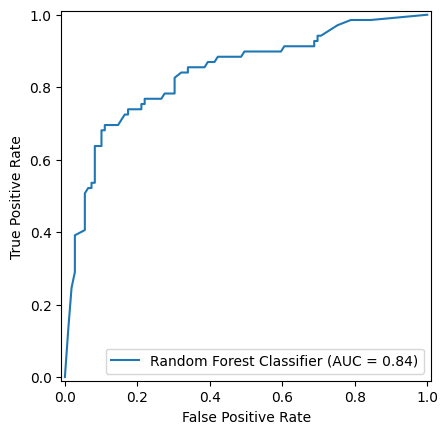

Cross-Validation Accuracy Scores: [0.76966292 0.79775281 0.86516854 0.78651685 0.83050847]
Average CV Score: 0.81


In [97]:
# Modelio tikslumo įvertinimas
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# ROC kreivės ir AUC skaičiavimas
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Kryžminės patikros tikslumo įvertinimas
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Rezultatų atvaizdavimas
print(f"Model accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest Classifier').plot()
plt.show()
print("Cross-Validation Accuracy Scores:", cv_scores)
print(f"Average CV Score: {cv_scores.mean():.2f}")

In [124]:
failo_kelias0 = r"C:\Users\Pauliussl\Paskaita79\Titanic\test.csv"
test_data0 = pd.read_csv(failo_kelias0, header=0)

test_data0["Pclass"] = pd.to_numeric(test_data0["Pclass"], errors='coerce')      # Pclass
test_data0["Sex"] = test_data0["Sex"].map({'male': 0, 'female': 1})              # Sex
test_data0["Age"] = pd.to_numeric(test_data0["Age"], errors='coerce')           # Age
test_data0["SibSp"] = pd.to_numeric(test_data0["SibSp"], errors='coerce')       # SibSp
test_data0["Parch"] = pd.to_numeric(test_data0["Parch"], errors='coerce')       # Parch
test_data0["Fare"] = pd.to_numeric(test_data0["Fare"], errors='coerce')         # Fare
test_data0["Embarked"] = test_data0["Embarked"].map({"S": 0, "C": 1, "Q": 2})   # Embarked

test_data1 = test_data0.drop(columns= ['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data1
y_goal = model.predict(test_data1)
print(y_goal)

[0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


In [136]:
c = test_data0['PassengerId']

df = pd.DataFrame({'PassengerId': c, 'Survived': y_goal})
faila_issaugome = r"C:\Users\Pauliussl\Paskaita79\Titanic\gender_submission.csv"
df.to_csv(faila_issaugome, index=False)